In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
import sys

sys.path.append('..')
from helper import general as general
from helper import logic_regression as lr

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
print(data.head())

       exam1      exam2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


In [3]:
x = general.get_x(data)
print(x.shape)

(100, 3)


In [4]:
y = general.get_y(data)
print(y.shape)

(100,)


In [5]:
theta = np.zeros(3)
print(theta)

print(lr.cost(theta, x, y))
print(lr.gradient(theta, x, y))

[0. 0. 0.]
0.6931471805599453
[ -0.1        -12.00921659 -11.26284221]


In [6]:
res = opt.minimize(fun=lr.cost, x0=theta, args=(x, y), method='Newton-CG', jac=lr.gradient)
print(type(res))
print(res)

<class 'scipy.optimize._optimize.OptimizeResult'>
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.20349770249211604
       x: [-2.516e+01  2.063e-01  2.015e-01]
     nit: 29
     jac: [ 2.673e-05  1.769e-03  1.645e-03]
    nfev: 73
    njev: 204
    nhev: 0


In [7]:
final_theta = res.x
print(res.x)

[-25.16376776   0.20625197   0.20149048]


In [8]:
# https://www.cnblogs.com/volcao/p/9368030.html
# θT.xb = θ0 + θ1.x1 + θ2.x2 = 0，则该边界是一条直线，因为分类问题中特征空间的坐标轴都表示特征；
# 那么 x2 可以直接算出来

coef = -(res.x / res.x[2])
print(coef)
x = np.arange(130, step=0.1)
y = coef[0] + coef[1] * x
print(y)

[124.88812168  -1.02363132  -1.        ]
[124.88812168 124.78575855 124.68339542 ...  -7.87686002  -7.97922315
  -8.08158628]


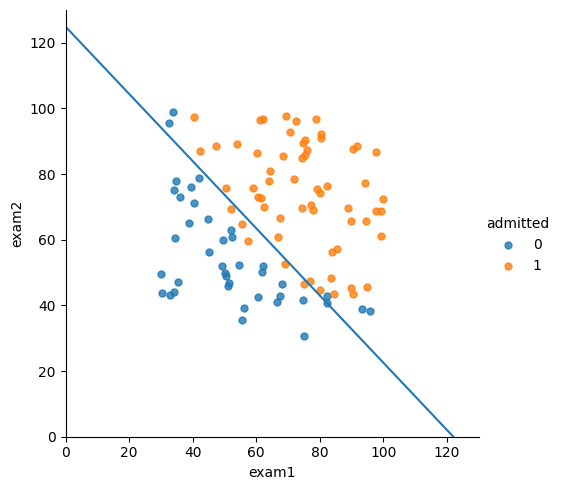

In [9]:
sns.lmplot(data=data, x='exam1', y='exam2', hue='admitted', fit_reg=False, scatter_kws={"s": 25})
plt.plot(x, y)
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.show()